In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets

dataset = datasets.load_breast_cancer()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2]:
## Model training
model = LogisticRegression(random_state=10,penalty = 'l2', C = 1.0)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print(" Logistic Regression Classifier Results")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1score:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


 Logistic Regression Classifier Results
Accuracy: 0.9649
Precision: 0.9733
Recall: 0.9733
F1 Score: 0.9733
Confusion Matrix:
[[37  2]
 [ 2 73]]


<Figure size 600x600 with 0 Axes>

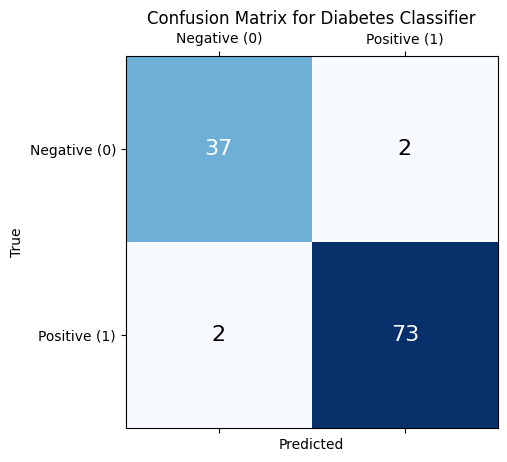

In [3]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(6, 6))

    plt.matshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix for Diabetes Classifier')

    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Negative (0)', 'Positive (1)'])
    plt.yticks(tick_marks, ['Negative (0)', 'Positive (1)'])

    plt.ylabel('True')
    plt.xlabel('Predicted')

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontsize=16)
    plt.show()

plot_confusion_matrix(conf_matrix)

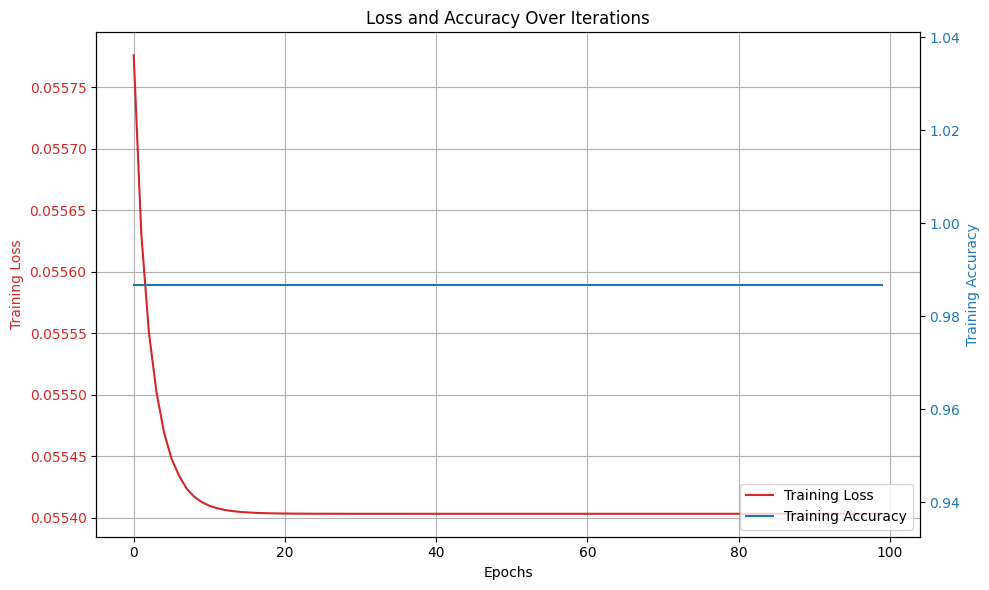

In [5]:
## loss and classification accuracy over iterations

from sklearn.metrics import log_loss

def plot_convergence_history(X_train, y_train, initial_learning_rate=0.01, n_epochs=100):

    iter_model = LogisticRegression(
        solver='saga',## gradient descent algorithm for handling iterative updates
        max_iter=500,
        warm_start=True,         # Allows continued fitting from the previous state
        random_state=10,
        C = 1.0,
        penalty = 'l2'
    )

    loss_history = []
    accuracy_history = []

    for epoch in range(1, n_epochs + 1):

        iter_model.max_iter = epoch + 500

        iter_model.fit(X_train, y_train)

        y_prob = iter_model.predict_proba(X_train)[:, 1] ## Gets the model's probability for every sample belonging to the positive class (1)
        current_loss = log_loss(y_train, y_prob)
        loss_history.append(current_loss)

        current_pred = iter_model.predict(X_train)
        current_accuracy = accuracy_score(y_train, current_pred)
        accuracy_history.append(current_accuracy)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:red'
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Training Loss', color=color)
    ax1.plot(loss_history, color=color, label='Training Loss')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Training Accuracy', color=color)
    ax2.plot(accuracy_history, color=color, label='Training Accuracy')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Loss and Accuracy Over Iterations')
    fig.tight_layout()
    fig.legend(loc='lower right', bbox_to_anchor=(1, 0), bbox_transform=ax1.transAxes)
    plt.show()

plot_convergence_history(X_train_scaled, y_train)